# 머신러닝 데이터 전처리


In [1]:
from sklearn.preprocessing import LabelEncoder

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "믹서", "믹서"]
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 리스트의 순서대로 0부터 순서대로 정수값을 부여

print("labels:", labels)
print("encoder.classes_:", encoder.classes_)
print("encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]):", encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

labels: [0 1 4 5 3 2 2]
encoder.classes_: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]): ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "믹서", "믹서"]
items = np.array(items).reshape(-1, 1)
ohe = OneHotEncoder()
ohe.fit(items)
oh_labels = ohe.transform(items)

print(oh_labels.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


## 예측값

- 정확도 (accurcy)
  from sklearn.metrics import accuracy_score
  accuracy_score(정답, 예측)
- 정밀도 (precision)  
  from sklearn.metrics import precision_score
  precision_score(정답, 예측)
- 재현율 (recall)  
  from sklearn.metrics import recall_score
  recall_score(정답, 예측)
- F1 스코어  
  from sklearn.metrics import f1_score
  f1_score(정답, 예측)
- ROC, AUC  
  from sklearn.metrics import roc_auc_score
  roc_auc_score(정답, 예측)


# 다중 분류

### 손실함수

- BinaryCrossEntropy
- CategoricalCrossEntropy 카테고리가 셋이상인경우
- SparseCategoricalCrossEntropy 원핫 인코딩이 아니고 정수로 주어지면


In [ ]:
#BinaryCrossentropy
import tensorflow as tf

y_true = [[1],[0],[0],[1]]
y_pred = [[0.3],[1],[0.2],[0.9]]

y_true = np.array(y_true)
y_pred = np.array(y_pred)

lbc = tf.keras.losses.BinaryCrossentropy()
print(lbc(y_true, y_pred).numpy())

4.368716


In [8]:
#CategoricalCrossentropy
#고양이 100, 호랑이 010, 강아지 001
# 범주형 데이터로 함
y_true = [[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]]
y_pred = [[0.1, 0.9, 0.0], [0.9, 0.0, 0.1], [0.2, 0.4, 0.4]]
# 0.1이 고양이라고 예측할 
# 고양이를 고양이라고 예측
# 호랑이, 강아지

y_true = np.array(y_true)
y_pred = np.array(y_pred)

lcc = tf.keras.losses.CategoricalCrossentropy()
print(lcc(y_true, y_pred).numpy())


0.37567058


In [9]:
#SparseCategoricalCrossentropy
y_true = [1, 0, 2]
y_pred = [[0.1, 0.9, 0.0], [0.9, 0.0, 0.1], [0.2, 0.4, 0.4]]

y_true = np.array(y_true)
y_pred = np.array(y_pred)

lscc = tf.keras.losses.SparseCategoricalCrossentropy()
print(lscc(y_true, y_pred).numpy())


0.37567067


In [10]:
## Keras를 이용한 mnist 숫자인식

import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

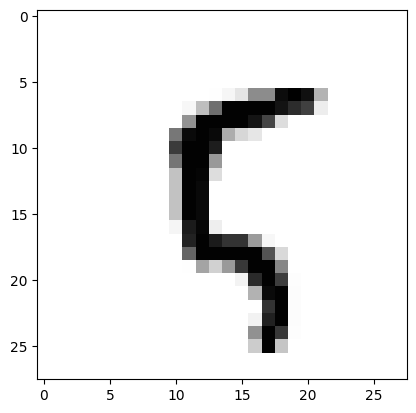

In [27]:
plt.imshow(x_train[100], cmap='Greys')

In [26]:
print(x_train[0]) # 0~255 사이의 값
# 0~1 사이의 값으로 정규화
print(x_train[0] / 255.0)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [28]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [32]:
# 모델 만들기

model = tf.keras.models.Sequential() #순차적으로 모델을 만들겠다
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))# 28*28을 1차원으로 펼침
model.add(tf.keras.layers.Dense(512, activation='relu')) # 512개의 노드를 가진 은닉층
model.add(tf.keras.layers.Dropout(0.2)) # 20%의 노드를 끔
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 10개의 노드를 가진 출력층
# 소프트 맥스를 쓰는 이유 : 0~9까지의 숫자 중 하나로 분류하기 위해
# dense는 완전연결층
# 단은 relu를 쓰는 이유 : 0보다 작은 값은 0으로, 0보다 큰 값은 그대로 출력하기 위해

model.compile(optimizer='adam',         loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/Users/coldbrew/miniconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.fit(x_train, y_train, epochs=5)

score = model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8941 - loss: 0.3628
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9683 - loss: 0.1023
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0650
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0488
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9876 - loss: 0.0397
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.9723 - loss: 0.0887


In [34]:
# Keras를 이용한 fashion mnist 패션인식
# categorical_crossentropy

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


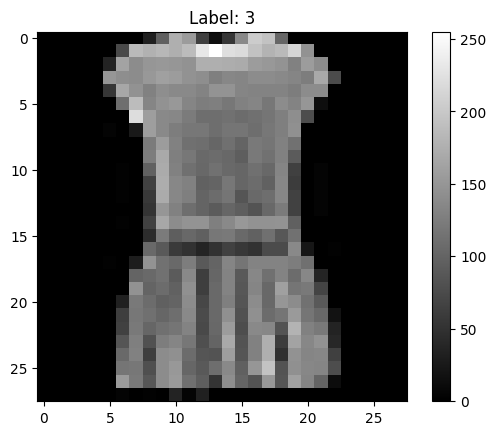

In [39]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.imshow(train_images[3], cmap='gray')  # cmap='gray'로 흑백 이미지 설정
plt.title(f"Label: {train_labels[3]}")  # 레이블 출력
plt.colorbar()  # 컬러바 추가 (선택)
plt.show()

In [51]:
len(np.unique(test_labels))

10

In [71]:
train_images = train_images/255.0
test_images = test_images/255.0

In [102]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dense(2028, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(layers.Dense(1024, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


/Users/coldbrew/miniconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.7006 - loss: 3.4699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.8252 - loss: 0.5038
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.8389 - loss: 0.4523
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.8493 - loss: 0.4234
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.8575 - loss: 0.4008


In [95]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.8593 - loss: 0.3951


[0.3917907476425171, 0.8579999804496765]

In [98]:
# 패션 mnist를 활용해 인코딩 연습

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

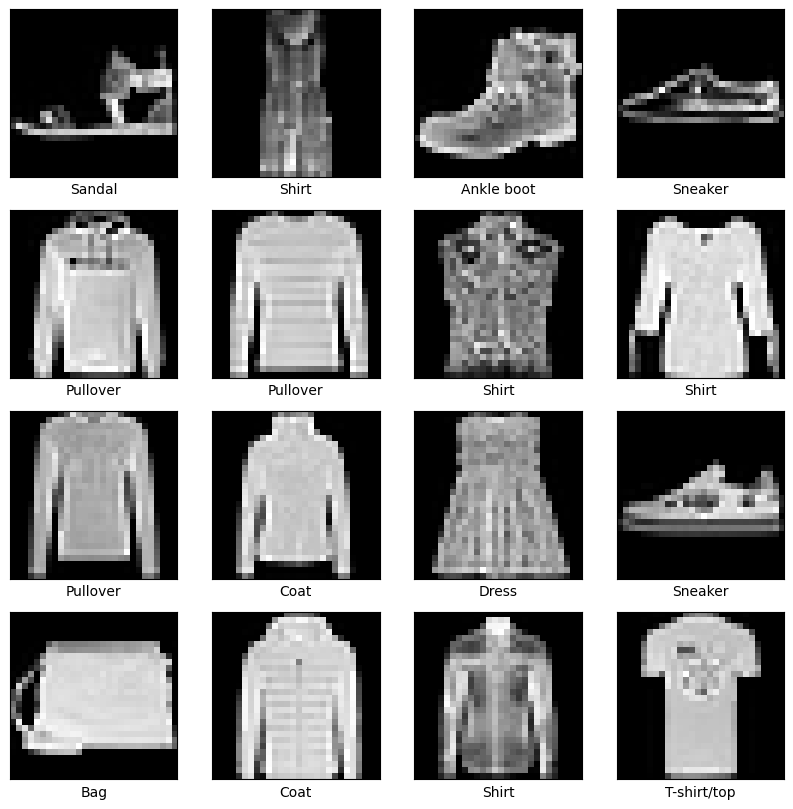

In [99]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
samples = np.random.randint(train_images.shape[0], size=16)
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[samples[i]], cmap='gray')
    plt.xlabel(class_names[train_labels[samples[i]]])

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28) (42000,) (18000,)


In [103]:
# 이미지 데이터 정규화
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
X_train = X_train / 255.0
X_val = X_val / 255.0
test_images = test_images / 255.0

In [105]:
X_train = X_train.reshape((-1, 28*28))
X_val = X_val.reshape((-1, 28*28))
X_test = test_images.reshape((-1, 28*28))

print(X_train.shape, X_val.shape, X_test.shape)

(42000, 784) (18000, 784) (10000, 784)


In [106]:
#입력 형식이 바뀌어서 categorical_crossentropy를 사용해야 함
to_categorical = tf.keras.utils.to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
test_labels = to_categorical(test_labels)

y_train.shape, y_val.shape, test_labels.shape

((42000, 10), (18000, 10), (10000, 10))

In [107]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(784,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model
model = build_model()
model.summary()

/Users/coldbrew/miniconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_39 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.7441 - loss: 0.7317 - val_accuracy: 0.8579 - val_loss: 0.3984
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.8530 - loss: 0.4044 - val_accuracy: 0.8651 - val_loss: 0.3642
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.8709 - loss: 0.3493 - val_accuracy: 0.8534 - val_loss: 0.3856
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.8813 - loss: 0.3189 - val_accuracy: 0.8801 - val_loss: 0.3339
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.8850 - loss: 0.3119 - val_accuracy: 0.8762 - val_loss: 0.3456
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.8911 - loss: 0.2918 - val_accuracy: 0.8797 - val_loss: 0.3360
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.8943 - loss: 0.2790 - val_accuracy: 0.8830 - val_loss: 0.3210
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.8972 -

# 실습 펭귄 데이터


In [38]:
import pandas as pd
df = pd.read_csv('data/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [40]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [41]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [42]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [43]:
df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [44]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


<Axes: xlabel='species', ylabel='Count'>

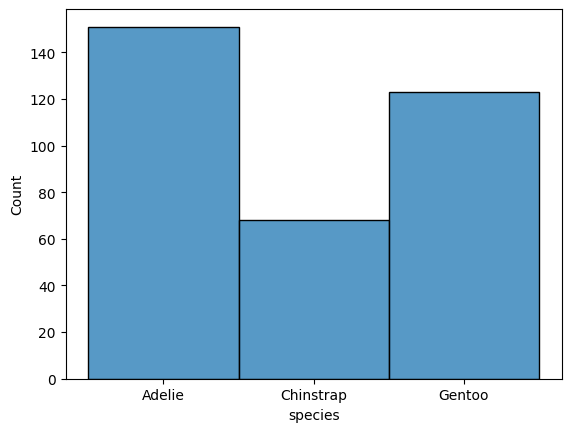

In [45]:
import seaborn as sns
sns.histplot(df['species'])

<Axes: ylabel='body_mass_g'>

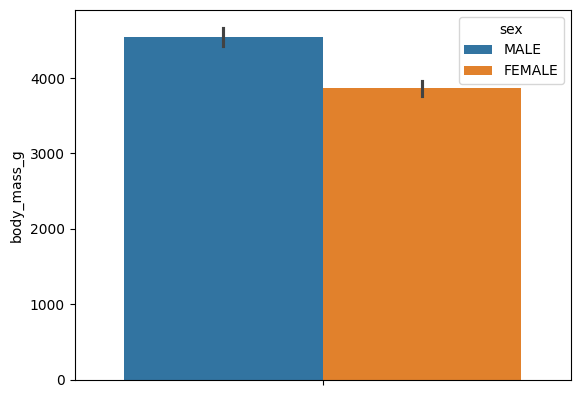

In [46]:
sns.barplot(y= df['body_mass_g'], hue=df['sex'])


In [47]:
df[df['sex'] == 'MALE']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


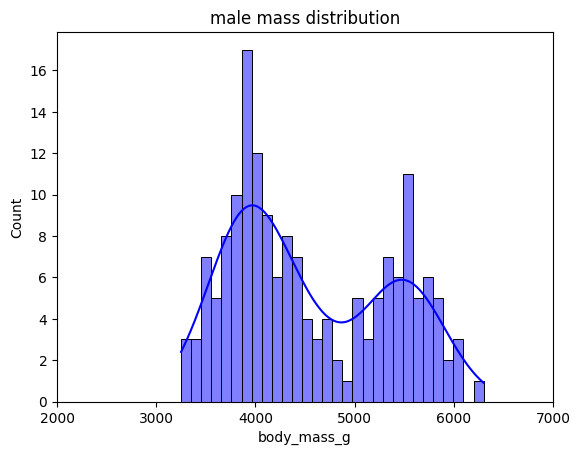

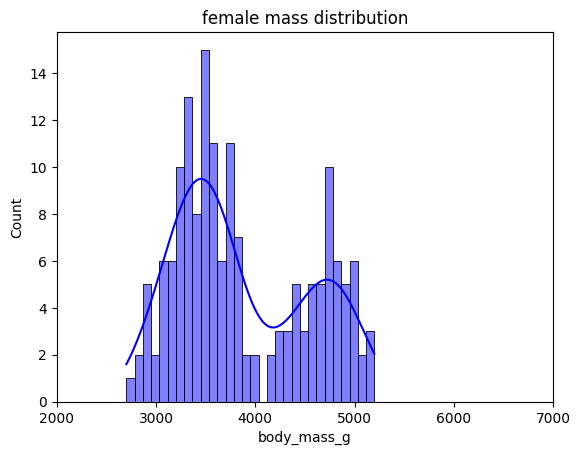

In [51]:
df_male = df[df['sex'] == 'MALE']
plt.title('male mass distribution')
plt.xlim(2000, 7000)
sns.histplot(data=df_male, x='body_mass_g', bins=30, kde=True, color='blue')

plt.show()
df_female = df[df['sex']=='FEMALE']
plt.title('female mass distribution')
plt.xlim(2000, 7000)

sns.histplot(data=df_female, x='body_mass_g', bins=30, kde=True, color='blue')
plt.show()


<Axes: xlabel='sex', ylabel='body_mass_g'>

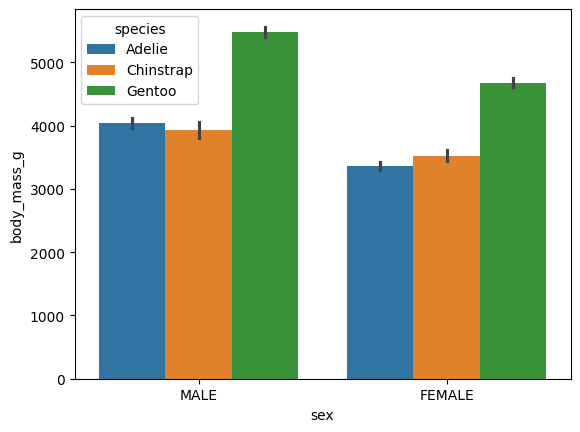

In [58]:
sns.barplot(x='sex', y='body_mass_g', hue='species', data=df)

In [59]:
# 예제: 기존 데이터프레임 df 사용
# species와 sex를 기준으로 body_mass_g 평균 계산
grouped_means = df.groupby(['species', 'sex'])['body_mass_g'].mean()

# 결측치를 채우는 함수 정의
def fill_missing_sex(row):
    if pd.isnull(row['sex']):  # sex가 결측치인 경우
        # 해당 species와 body_mass_g 값에 가장 가까운 평균의 성별을 찾음
        species_means = grouped_means[row['species']]  # 해당 종의 평균 값
        closest_sex = species_means.sub(row['body_mass_g']).abs().idxmin()  # 차이가 가장 적은 성별
        return closest_sex
    return row['sex']  # 결측치가 아닌 경우 기존 값 유지

# 결측치 채우기
df['sex'] = df.apply(fill_missing_sex, axis=1)

# 결과 확인
print(df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [60]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
col_names = df.columns

for col in col_names:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [62]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop('species', axis=1)
y = df['species']

X = scaler.fit_transform(X)

In [64]:
X.shape, y.shape

((342, 6), (342,))

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,363 (79.55 KB)

 Trainable params: 6,787 (26.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,576 (53.04 KB)

In [68]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(6,)))
# model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3731 - loss: 1.1302  
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.8349
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8259 - loss: 0.6583
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8902 - loss: 0.5190
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.3891
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.2816
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.1888
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9698 - loss: 0.1364
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0920
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0588
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0435
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0321
Epoch 13/20

In [69]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0112 


[0.010493071749806404, 1.0]

In [57]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [73]:
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix = np.array(matrix)

In [74]:
matrix.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

# SVM(support vector machine)


In [76]:
#선형 분류, 비선형 분류
# 비선형 분류할때 고차원에 매핑해서 선형으로 분류하는 방법
# 데이터 스케일링 중요
# 분류 모델은 svc
# 회귀 모델은 svr

from sklearn.svm import SVC
classifier = SVC(kernel='linear')

X_train = [[1,2],[1,5],[2,2],[7,5],[9,4],[8,2]]
labels = [1,1,1,0,0,0] # 분류 1도는 0

classifier.fit(X_train, labels)


SVC(kernel='linear')

In [77]:
print(classifier.predict([[3,2]]))

[1]


In [78]:
classifier.support_vectors_

array([[7., 5.],
       [8., 2.],
       [2., 2.]])

In [79]:
from sklearn import datasets, metrics
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import pandas as pd

data = datasets.fetch_california_housing()
X, y = shuffle(data.data, data.target, random_state=7)

num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [ ]:
sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)
# C는 오차 허용 정도(패널티), epsilon은 오차 허용 범위
# C값이 클수록 하드마진, 작을수록 소프트마진(오류 허용)
sv_regressor.fit(X_train, y_train)

y_pred = sv_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

test_data = [3.7, 1.5, 3.1, 2.5, 2.4, 2.5, 2.5]
print("Predicted price:", sv_regressor.predict([test_data])[0])

In [1]:
# 의사결정트리
from sklearn.tree import DecisionTreeClassifier
X = [[0,0], [1,1]]
y = [0, 1]

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [2]:
clf.predict([[2,2]])

array([1])

In [9]:
#iris 데이터를 이용한 의사결정트리

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

iris = load_iris()
x_index = 0
y_index = 1


/var/folders/w5/_14ckm9x10lb_j7dz73z0rjc0000gn/T/ipykernel_29398/2443273206.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.cm.get_cmap('Set1', 3), )


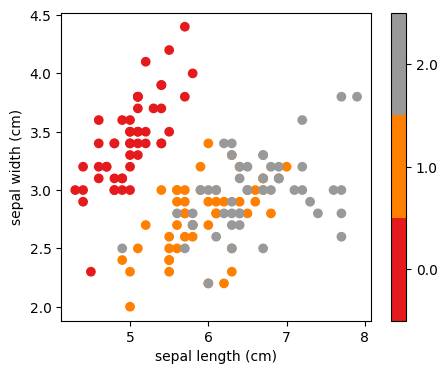

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.cm.get_cmap('Set1', 3), )
formatter = FormatStrFormatter('%0.1f')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()


In [1]:
%pip install graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


훈련 세트 정확도: 0.9733333333333334


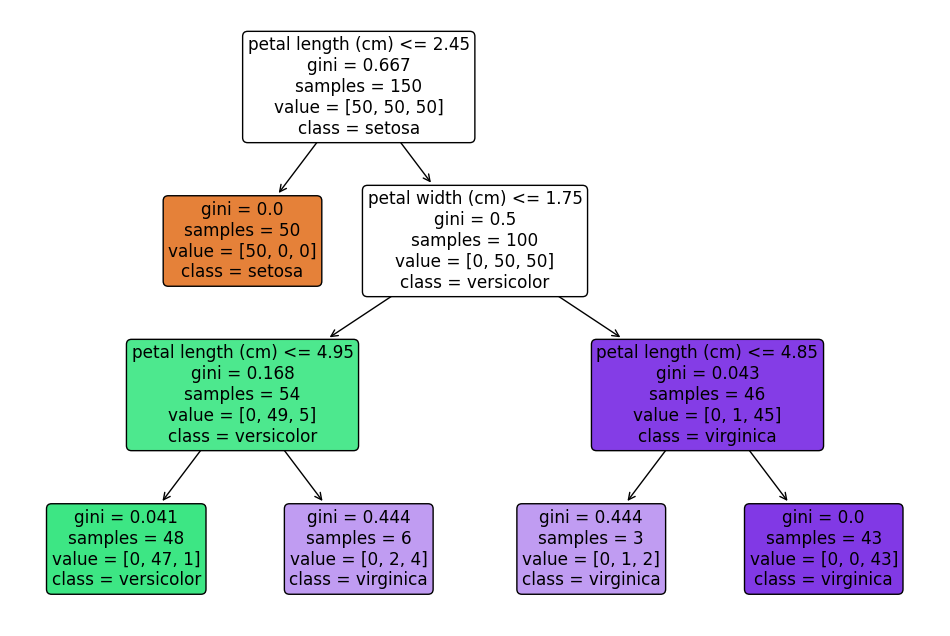

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1) 데이터 불러오기
iris = load_iris()
X = iris.data      # 꽃받침 길이/너비, 꽃잎 길이/너비 (4개 특성)
y = iris.target    # 품종(0: setosa, 1: versicolor, 2: virginica)

# 2) 모델 생성 및 학습
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,       # 트리의 최대 깊이 (자유롭게 조정 가능)
    random_state=42    # 재현성을 위한 난수 고정
)
clf.fit(X, y)

# 3) 결과 확인 (훈련 세트 정확도)
score = clf.score(X, y)
print("훈련 세트 정확도:", score)

# 4) 결정 트리 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plot_tree(
    clf,
    feature_names=iris.feature_names,  # ["sepal length (cm)", ...]
    class_names=iris.target_names,     # ["setosa", "versicolor", "virginica"]
    filled=True,                       # 노드 색 채우기
    rounded=True,                      # 노드를 둥근 테두리로
)
plt.show()

In [3]:
#위에 그려진 트리를 iris.pdf 파일로 저장

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

In [12]:
import pandas as pd

penguins = pd.read_csv('data/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


훈련 세트 정확도: 0.9941860465116279


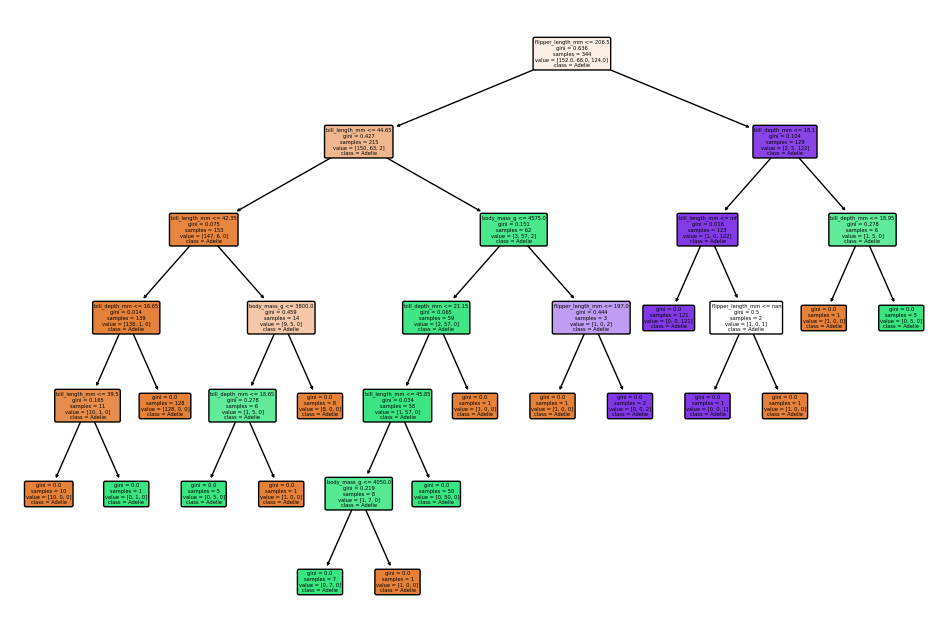

In [13]:
X = penguins.drop(['species', 'island','sex'], axis = 1)      # 꽃받침 길이/너비, 꽃잎 길이/너비 (4개 특성)
y = penguins['species']    # 품종(0: setosa, 1: versicolor, 2: virginica)

# 2) 모델 생성 및 학습
clf = DecisionTreeClassifier(
    criterion='gini',
    # max_depth=-1,       # 트리의 최대 깊이 (자유롭게 조정 가능)
    random_state=42    # 재현성을 위한 난수 고정
)
clf.fit(X, y)

# 3) 결과 확인 (훈련 세트 정확도)
score = clf.score(X, y)
print("훈련 세트 정확도:", score)

# 4) 결정 트리 시각화
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plot_tree(
    clf,
    feature_names=X.columns,  # ["sepal length (cm)", ...]
    class_names=y.values,     # ["setosa", "versicolor", "virginica"]
    filled=True,                       # 노드 색 채우기
    rounded=True,                      # 노드를 둥근 테두리로
)
plt.show()

In [11]:
#위에 그려진 트리를 iris.pdf 파일로 저장

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('penguins')

'pengines.pdf'

# Convolutional Neural Network


## 이미지 자체가 입력으로 들어가서 conv 하고 마지막 부분에 FC layers해서 y^ 계산

- 수학적 연산을 사용해서 이미지의 특성을 추출하는 레이어를 포함
- 이미지, 영상 데이터 처리가 유용
- DNN은 파라미터가 엄청 나게 늘어남
  - 1차원 입력은 위치 상관관계가 적어져서 입력 데이터 변형에 매우 취약해짐
- CNN은 conv layer 와 pooling layer가 존재함
  - conv relu pooling 순서로 쌓음
  - 마지막 층은 soft max


### Convolution

    -> input : h,w 2차원이미지
    -> kernel : 특징 추출을 위해 상용되는 필터
    -> feature map : 커널을 거쳐 연산된 결과로 추출된 특징을 나타낸다

#### 학습데이터에 너무 핏되어서 복잡도가 증가될경우 과적합 문제 발생한다.

##### 과적합 문제해결

- 규제 L1, L2
- 드롭 아웃 기법
- Batch Normalization
  - 미니배치와 내부 공변량 변화를 이용
  - 미니배치 : 일정 크기로 나누어 놓은거
  - 공변량 변화 : 이전 층들의 학습에 의해 가중치 값이 변하게 되면 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생하는 문제

##### 모든 학습은 오차역전파 알고리즘 -> **경사하강법**

GD, Momentum, AdaGrad, RMSprop, Adam

##### Momentum

- 경사하강법에 관성을 더해주는 알고리즘, 합벡터를 구해서 사용

##### NAG

- 모멘텀을 이용해 미리 이동 시키고 그 위치에서 그레디언트 계산함

##### AdaGrad

- 각 가중치에 대해 별도의 학습률을 사용하는 알고리즘

##### RMSprop

- 지수 이동 평균 기법을 적용 최근 값의 영향은 더욱 크고, 오래된 값의 영향은 대폭 낮추는 알고리즘

##### Adam

- 가장 좋은 학습 성능을 보이며 현재 딥러닝 모델에 가장 많이 쓰이는 대중적인 알고리즘
- RMSprop 방식과 직전 단계 가중치 변화량에 힘을 실어주는 Momentum 방식이 결합된 Adam 알고리즘


## 데이터 어그맨테이션 해보기


#### 윤곽 찾기는 : 라플라시안 필터


인풋 7x7 , 커널 3x3 ,아웃풋 5x5로 출력되어서 제로페딩을 통해 7x7을 유지해야함

- 데이터 손실을 줄여주기위해 원래 데이터에 없던 데이터를 붙였기 때문에 noise가 발생
- 필터 사이즈 : 출력 크기 조절 3x3, 2x2 정도로
- Stride 필터가 이미지에 적용될때 한번에 움직이는 픽셀
- Padding 입력 데이터 주변에 0또는 1로 채우는것
